### Introduction
In this kernal, I will use TF-IDF to vectorize the articles data and cluster them. Then, I will make paper recommendation.

**1. Input data**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
text = pd.read_csv('Final_AA_without_Nan.csv')

In [3]:
text = text.drop(['Descriptions', 'Authors', 'Published_Dates', 'Keywords', 'Summaries', 'Publication', 'category', 'Source_URLs'], axis=1).dropna().reset_index(drop=True)
text.head()

,Headlines,Articles
0,BOOZE RUINS LIVES!,â€œTHE wake-up call for me should have been th...
1,"ALCOHOLICS, IT'S NEVER TOO LATE!",IF YOU have a drinking problem or you know som...
2,NO BOOZE FOR THESE TWO!,SUNDAY was a joyful day as a husband and wife ...
3,A SEASON TO SOBER UP!,MZANSI is known as a nation of boozers.To give...
4,NAIR MAY GO FOR MENTAL HEALTH CHECK!,HE called President Cyril Ramaphosa the k-word...


**2. Using TF-IDF vectorize the articles**

**Introduction** to TF-IDF

In [4]:
text_content = text['Articles']
vector = TfidfVectorizer(stop_words = 'english')
tfidf = vector.fit_transform(text_content)
text_content.head()

0    â€œTHE wake-up call for me should have been th...
1    IF YOU have a drinking problem or you know som...
2    SUNDAY was a joyful day as a husband and wife ...
3    MZANSI is known as a nation of boozers.To give...
4    HE called President Cyril Ramaphosa the k-word...
Name: Articles, dtype: object

**3. Using elbow method to decide cluster number**

Introduction to **elbow method**

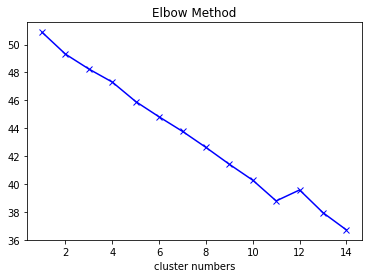

In [5]:
K = range(1,15)
SSE = []
for k in K:
    kmeans = MiniBatchKMeans(n_clusters = k,batch_size = 300)
    kmeans.fit(tfidf)
    SSE.append(kmeans.inertia_)

plt.plot(K,SSE,'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

**5. Using MiniBatchKMean to cluster**

**Comparison of the K-Means and MiniBatchKMeans clustering algorithms**

In [6]:
k = 4
kmeans = MiniBatchKMeans(n_clusters = k)
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list) 

cluster0:
['said', 'drinking', 'alcohol', 'says', 'iâ', 'people', 'like', 'years', 'drugs', 'imbizo', 'œi', 'life', 'drug', 'year', 'time']
cluster1:
['court', 'offshore', 'security', 'president', 'nair', 'khan', 'national', 'fonseca', 'mossack', 'commission', 'bail', 'documents', 'bathla', 'justice', 'sharif']
cluster2:
['students', 'said', 'police', 'complaint', 'camp', 'addicts', 'sex', 'joe', 'calls', 'dr', 'received', 'yoga', 'student', 'addiction', 'fr']
cluster3:
['aa', 'alcoholics', 'women', 'alcoholism', 'fellowship', 'drinking', 'hope', 'alcohol', 'members', 'lovato', 'sobriety', 'sober', 'help', 'march', 'adsbygoogle']


**6. Article Recommendation**

Since we had vectorize the articles by TF-IDF, we only need to compare articles by comparing their vectors. Bigger inner product of two vectors means they shares more similar information.

In [7]:
similarity = np.dot(tfidf[0],np.transpose(tfidf))
x = np.array(similarity.toarray()[0])
print(text['Headlines'][0])
print('\nsimiliar papers:')
print('\n'.join(text['Headlines'].loc[np.argsort(x)[-7:-2]]))

BOOZE RUINS LIVES!

similiar papers:
Raising a toast to life
Breaking new ground
Hope for alcoholics through AA: Experts
NO BOOZE FOR THESE TWO!
Kicking the bottle, one day at a time


**7. Topics modeling**

Here I use NMF instead of LDA because LDA's calculation is time-consuming.

The major topics consist of politics, society, finance and internetional affairs, which is quite similiar to our cluster result.

In [8]:
from sklearn.decomposition import NMF

nmf  = NMF(n_components = 4)
nmf.fit(tfidf)
for i in range(0,k):
    word_list=[]
    print("Topic%d:"% i)
    for j in nmf.components_.argsort()[i,-16:-1]:
        word_list.append(terms[j])
    print(word_list)

Topic0:
['programme', 'helpline', 'quit', 'disease', 'chandigarh', 'membership', 'aaâ', 'wanting', 'women', 'members', 'hope', 'drinking', 'alcoholics', 'fellowship', 'alcoholism']
Topic1:
['day', 'sex', 'time', 'life', 'imbizo', 'year', 'like', 'iâ', 'people', 'œi', 'said', 'years', 'drink', 'says', 'alcohol']
Topic2:
['sac', 'committee', 'singh', 'case', 'justice', 'iaf', 'commission', 'nair', 'said', 'complaints', 'bench', 'adsbygoogle', 'received', 'complaint', 'police']
Topic3:
['companies', 'law', 'zuma', 'islands', 'panama', 'firm', 'tax', 'british', 'sharif', 'president', 'documents', 'prime', 'mossack', 'fonseca', 'minister']
